# 국민건강영양조사 자료 중 구강검사데이터셋
---
출처 : https://knhanes.cdc.go.kr/knhanes/main.do
   

### 1. 구강검사(검진조사) 
 - 질병관리본부에서 수행중인 국민건강양영조사 중 구강검진조사 데이터이다
 - 매년 만 1세 이상을 대상으로 치아와 보철물 상태, 치주조직 상태, 칫솔질 실천을 포함한 구강건강관련 행태의 자료를 수집하고 있다.
 - 구강검진은 구강설문조사, 치아상태, 치주조직검사로 이루어져 있다. 
 - 공중보건치과의를 선발하여 교육훈련과정을 이수한 조사원이 구강검진을 수행한다. 

<center>![구강검진](https://github.com/sung-hyo/Neural_Networks_using_Periodtitis_prediction/blob/master/%EA%B5%AC%EA%B0%95%EA%B2%80%EC%A7%84%EA%B3%BC%EC%A0%95.png?raw=1)</center>
<출처: 국민건강영양조사 조사수행지침>

#### 1.1 치아상태
----
각 치아번호마다 아래의 값으로 코딩한다.

0. 건전치면
1. 우식치면
3. 우식경험처치치면
4. 우식경험상실치면
5. 우식비경험상실치면
6. 전색치면
7. 우식비경험처치치면
8. 미맹출치면
9. 기록불가치면
![구강검진](https://github.com/sung-hyo/Neural_Networks_using_Periodtitis_prediction/blob/master/%EA%B5%AC%EA%B0%95%EA%B2%80%EC%A7%84.png?raw=1) 
<출처: 국민건강영양조사 조사수행지침>

#### 1.2. 치주질환
---
 - 치주질환(또는 치주병, 치주염)은 세균에 의해 발생되는 치아주위 잇몸의 염증성 질환으로 치주인대와 잇몸뼈의 파괴를 일으킨다.
 - 
 
![치주염](https://github.com/sung-hyo/Neural_Networks_using_Periodtitis_prediction/blob/master/periodontitis.png?raw=1)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


![치주탐침](https://github.com/sung-hyo/Neural_Networks_using_Periodtitis_prediction/blob/master/cpi_probe.png?raw=1)
<출처: 국민건강영양조사 조사수행지침>

 - 치주탐침을 잇몸에 찔러서 잇몸뼈의 위치까지 얼마나 깊이 들어가는지와 출혈을 관찰한다.
![치주낭검사](https://github.com/sung-hyo/Neural_Networks_using_Periodtitis_prediction/blob/master/%EC%B9%98%EC%A3%BC%EB%82%AD%EA%B2%80%EC%82%AC.png?raw=1)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


 - 치주질환은 국민건강영양조사 구강건강실태 조사방법에 따라 지역사회치주지수(Community Periodontal Index, CPI)를 이용하여 치과의사가 시진과 촉진으로 검진한다.
 - 만 19세 이상의 대상자의 구강 내 6분악 중 검사표준 치아 상·하악의 좌·우측 제 1,2 대구치, 상악 우측 중절치, 하악 좌측 중절치를 치주 탐침 시 치주낭 깊이가 4 mm 이상 보유자를 치주질환자로 분류한다
 - 데이터셋의 치주조직상태 변수인 O_CPI_UR, O_CPI_UM, O_CPI_UL, O_CPI_LL으로 산출한 지표이다.

## 신경망 학습 목적
---
    치주질환을 검사하기 위한 치주낭 측정기(periodonal probe)를 치아에 찌르게 되면 출혈(이상이 있을 경우)과 통증이 유발된다. 또한 모든 치아를 검사해야 하는데 이는 시간소모가 많고 힘든 작업으로 알려져 있다. 주기적인 엑스레이 검사와 치주낭 측정 검사를 해야 사전에 치료가 가능하지만 주기적으로 하기 힘든게 현실이다. 치아 상태를 이용하여 치주질환을 분류하고자 한다. 

In [0]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 9.4MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

In [0]:

# 1. Authenticate and create the PyDrive client.

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

file_id = '1f0YFEA4tWK2gRUdSLktDCtoV8pjHkJZo'

downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('hn_dental_adj.sas7bdat')

In [0]:
import pandas as pd

dt_raw = pd.read_sas('hn_dental_adj.sas7bdat', format='sas7bdat').dropna() 

In [0]:
dt_raw.head()

,ID,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,...,O_TN73,O_TN74,O_TN75,O_CPI_UR,O_CPI_UM,O_CPI_UL,O_CPI_LR,O_CPI_LM,O_CPI_LL,NO_CPI_34
6224,b'A851913501',1.0,72.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
6226,b'A851915601',2.0,81.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6227,b'A851917101',1.0,62.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6228,b'A851917102',2.0,56.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0
6229,b'A851917701',1.0,55.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#자료가 제대로 읽어들여졌는지 확인한다.
print(dt_raw.shape)

(20453, 299)


In [0]:
# 변수명 속성 확인하기
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 299 entries, ID to NO_CPI_34
dtypes: float64(298), object(1)
memory usage: 46.8+ MB


In [0]:
# 변수명 확인하기 
dt_raw.columns.values.tolist()

['ID',
 'sex',
 'age',
 'O_DIP',
 'O_55B',
 'O_55D',
 'O_55O',
 'O_55M',
 'O_55L',
 'O_54B',
 'O_54D',
 'O_54O',
 'O_54M',
 'O_54L',
 'O_53B',
 'O_53D',
 'O_53M',
 'O_53L',
 'O_52B',
 'O_52D',
 'O_52M',
 'O_52L',
 'O_51B',
 'O_51D',
 'O_51M',
 'O_51L',
 'O_61B',
 'O_61M',
 'O_61D',
 'O_61L',
 'O_62B',
 'O_62M',
 'O_62D',
 'O_62L',
 'O_63B',
 'O_63M',
 'O_63D',
 'O_63L',
 'O_64B',
 'O_64M',
 'O_64O',
 'O_64D',
 'O_64L',
 'O_65B',
 'O_65M',
 'O_65O',
 'O_65D',
 'O_65L',
 'O_18B',
 'O_18D',
 'O_18O',
 'O_18M',
 'O_18L',
 'O_17B',
 'O_17D',
 'O_17O',
 'O_17M',
 'O_17L',
 'O_16B',
 'O_16D',
 'O_16O',
 'O_16M',
 'O_16L',
 'O_15B',
 'O_15D',
 'O_15O',
 'O_15M',
 'O_15L',
 'O_14B',
 'O_14D',
 'O_14O',
 'O_14M',
 'O_14L',
 'O_13B',
 'O_13D',
 'O_13M',
 'O_13L',
 'O_12B',
 'O_12D',
 'O_12M',
 'O_12L',
 'O_11B',
 'O_11D',
 'O_11M',
 'O_11L',
 'O_21B',
 'O_21M',
 'O_21D',
 'O_21L',
 'O_22B',
 'O_22M',
 'O_22D',
 'O_22L',
 'O_23B',
 'O_23M',
 'O_23D',
 'O_23L',
 'O_24B',
 'O_24M',
 'O_24O',
 'O_24D

In [0]:
# 자료를 복사하여 사용하고 원자료는 조작하지 않는다
dt = dt_raw.copy()

In [0]:
#연령을 범위로 구분하기
labels = ["{0} - {1}".format(i, i + 10) for i in range(19, 80, 10)]
dt['age']=dt.age.astype('int64')
dt['age'] = pd.cut(dt.age, range(19, 90, 10), right=False, labels=labels)

In [0]:
# 불필요한 변수 삭제
dt = dt.drop(columns = ['ID','O_CPI_UR','O_CPI_UM','O_CPI_UL','O_CPI_LL'], axis = 1)

In [0]:
dt.shape

(20453, 294)

In [0]:
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# 치아상태가 기록불가 일 경우 결측으로 변환
import numpy as np
dt = dt.replace(9.0, np.nan)
dt = dt.replace(8.0, np.nan)

In [0]:
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# 모든 변수가 카테고리 이므로 이를 변환 
#범주형 변수를 카테고리 속성으로 변경
for i in dt.columns:
    dt[i]=pd.Categorical(dt[i])

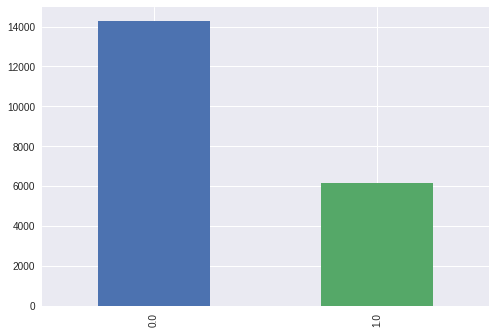

In [0]:
# 전체 자료에서 치주질환 빈도 확인
import matplotlib.pyplot as plt
dt['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

In [0]:
# 치주질환의 비율확인
(dt['NO_CPI_34'].value_counts()/dt['NO_CPI_34'].count())*100

0.0    69.784384
1.0    30.215616
Name: NO_CPI_34, dtype: float64

In [0]:
# 데이터 요약결과 확인
dt.describe()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
count,20453.0,20451,20453.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,18741.0,20018.0,20453.0
unique,2.0,7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,2.0
top,2.0,49 - 59,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
freq,11796.0,4064,14251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,12495.0,10773.0,14273.0


In [0]:
# 변수 중 unique가 0인 변수 
des_columns = dt.describe().T
des_columns.shape

(294, 4)

In [0]:
# 변수의 항목 값이 없는 변수 추출, unique == 0 
miss_columns = des_columns.loc[des_columns.unique==0 , :] 

In [0]:
#294개 변수 중 총 44개의 변수가 결측(치아상태가 기록불가)
miss_columns.shape

(44, 4)

In [0]:
#결측만 있는 변수 삭제하기 
miss_column_list = miss_columns.T.columns

In [0]:
miss_column_list

Index(['O_55B', 'O_55D', 'O_55O', 'O_55M', 'O_55L', 'O_54B', 'O_54D', 'O_54O',
       'O_54M', 'O_54L', 'O_53B', 'O_53D', 'O_53M', 'O_53L', 'O_52B', 'O_52D',
       'O_52M', 'O_52L', 'O_51B', 'O_51D', 'O_51M', 'O_51L', 'O_61B', 'O_61M',
       'O_61D', 'O_61L', 'O_62B', 'O_62M', 'O_62D', 'O_62L', 'O_63B', 'O_63M',
       'O_63D', 'O_63L', 'O_64B', 'O_64M', 'O_64O', 'O_64D', 'O_64L', 'O_65B',
       'O_65M', 'O_65O', 'O_65D', 'O_65L'],
      dtype='object')

In [0]:
# 변수 제외하기
for i in miss_column_list:
  dt = dt.drop(columns = [i], axis = 1)

In [0]:
dt.describe()

,sex,age,O_DIP,O_18B,O_18D,O_18O,O_18M,O_18L,O_17B,O_17D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
count,20453.0,20451,20453.0,10737.0,10737.0,10737.0,10737.0,10737.0,20421.0,20421.0,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,18741.0,20018.0,20453.0
unique,2.0,7,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,2.0
top,2.0,49 - 59,0.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
freq,11796.0,4064,14251.0,5079.0,5079.0,5079.0,5079.0,5079.0,13164.0,12950.0,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,12495.0,10773.0,14273.0


In [0]:
dt.shape

(20453, 250)

In [0]:
# 변경되었는지 확인
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 250 entries, sex to NO_CPI_34
dtypes: category(250)
memory usage: 5.1 MB


In [0]:
# 변수의 분포 확인하기 
columns_list = dt.columns
columns_list

Index(['sex', 'age', 'O_DIP', 'O_18B', 'O_18D', 'O_18O', 'O_18M', 'O_18L',
       'O_17B', 'O_17D',
       ...
       'O_TN82', 'O_TN81', 'O_TN71', 'O_TN72', 'O_TN73', 'O_TN74', 'O_TN75',
       'O_CPI_LR', 'O_CPI_LM', 'NO_CPI_34'],
      dtype='object', length=250)

In [0]:
for i in columns_list:
  print((dt[i].value_counts()/dt[i].count())*100)

2.0    57.673691
1.0    42.326309
Name: sex, dtype: float64
49 - 59    19.871889
39 - 49    18.424527
59 - 69    17.559044
29 - 39    16.346389
69 - 79    13.392988
19 - 29    10.884553
79 - 89     3.520610
Name: age, dtype: float64
0.0    69.67682
1.0    30.32318
Name: O_DIP, dtype: float64
5.0    47.303716
0.0    32.942163
4.0    17.444351
1.0     1.229394
7.0     0.819596
3.0     0.260780
Name: O_18B, dtype: float64
5.0    47.303716
0.0    32.672069
4.0    17.444351
1.0     1.443606
7.0     0.828909
3.0     0.307348
Name: O_18D, dtype: float64
5.0    47.303716
0.0    23.498184
4.0    17.444351
1.0     8.084195
3.0     2.840645
7.0     0.828909
Name: O_18O, dtype: float64
5.0    47.303716
0.0    32.616187
4.0    17.444351
1.0     1.331843
7.0     0.828909
3.0     0.474993
Name: O_18M, dtype: float64
5.0    47.303716
0.0    32.811772
4.0    17.444351
1.0     1.257334
7.0     0.828909
3.0     0.353916
Name: O_18L, dtype: float64
0.0    64.463053
4.0    13.804417
3.0     8.922188
5.0   

##신경망 모형 학습을 위한 데이터 분리 및 모형 구축

In [0]:
# 피쳐와 타겟을 분리한다.

periodontitis = dt[['NO_CPI_34']]
features_dt = dt.drop(columns = ['NO_CPI_34'], axis = 1)

In [0]:
periodontitis.head()

,NO_CPI_34
6224,1.0
6226,0.0
6227,0.0
6228,0.0
6229,0.0


In [0]:
features_dt_sc =  pd.get_dummies(features_dt)

In [0]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_sc, periodontitis, random_state=20181121)

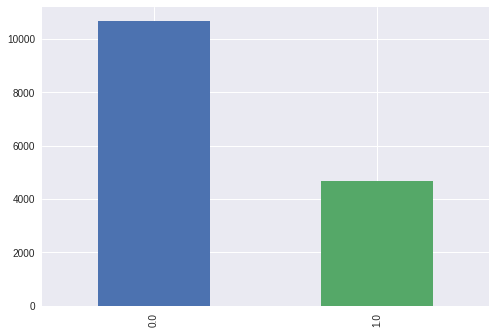

In [0]:
# test set 의 target 빈도 확인
import matplotlib.pyplot as plt
y_train['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

<Container object of 2 artists>

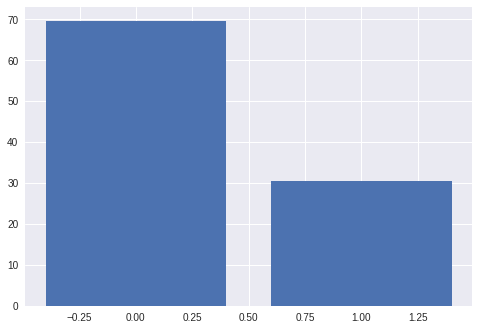

In [0]:
# test set 의 target 비율확인
rate = (y_train['NO_CPI_34'].value_counts()/y_train['NO_CPI_34'].count())*100 
xaxis = (0, 1)
plt.bar(xaxis, rate)

### 신경망 모형 만들기 

In [0]:
#target의 척도를 지정한다. 중요하다.
target_cat = pd.api.types.CategoricalDtype(categories=range(2), ordered=False)
print(target_cat.categories)

RangeIndex(start=0, stop=2, step=1)


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15339, 1235)
(5114, 1235)
(15339, 1)
(5114, 1)


In [0]:
##nb = number
nb_tr_examples, nb_inputs = X_train.shape
#hidden layer
nb_units_hl_1 = 250
#output number를 타겟의 행과열의수 1
nb_outputs = y_train.shape[1]
print(nb_tr_examples, nb_inputs, nb_units_hl_1, nb_outputs)

15339 1235 250 1


In [0]:
#필요한 모듈 가져오기
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import metrics

from keras.optimizers import SGD, Adam, RMSprop

Using TensorFlow backend.


In [0]:
# 기본 모형 만들기, 히든 노드 1개
import numpy
seed = 20181121
numpy. random.seed(seed)

# model parameters를 매개변수로 받아 모형을 동적으로 생성한다. 

def create_model(optimizer, lr, activation):
    
    model = Sequential()
    hl_1 = Dense(nb_units_hl_1, input_dim = nb_inputs)
    model.add(hl_1)
    hl_1_act = Activation(activation)
    model.add(hl_1_act)
    ol = Dense(nb_outputs)
    model.add(ol)
    ol_act = Activation(activation)
    model.add(ol_act)
    
    if optimizer == 'sgd':
        optim = SGD(lr=lr)
    if optimizer == 'rmsprop':
        optim = RMSprop(lr=lr)
    if optimizer == 'adam':
        optim = Adam(lr=lr)
    
    model.compile(optimizer=optim, loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

In [0]:
model = KerasClassifier(build_fn=create_model)

In [0]:
# 모형을 컴파일할 때와 컴파일된 모형을 훈력(fit)할 때 전달한 매개변수에
# 전달할 값들을 사전으로 만든다.
# 전달할 매개변수의 이름과 개수가 다른 경우에는 list of dictionaries를 만든다. 

#optimizers = ['sgd','adam','rmsprop']

#속도개선을 위해 학습률은 0.001로 지정
optimizers = ['rmsprop']
lr = [0.001]
act = ['sigmoid','tanh']

epochs = [10, 30]
batches = [50, 100]

param_grid = dict(optimizer = optimizers, lr=lr, activation=act, epochs=epochs, batch_size=batches)

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, random_state=20181121)

In [0]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['accuracy'], refit="accuracy", return_train_score=True, cv=kfold)

# KerasClassifier 내에서 target을 one-hot encoding하므로
# Keras NN model을 sklearn을 연결할 때 one-hot encoding 하지 않은 target을 사용한다. 

grid_result = grid.fit(X_train, y_train)

Epoch 1/10
12271/12271 [==============================] - 2s 185us/step - loss: 9.9490 - acc: 0.0732
Epoch 2/10
12271/12271 [==============================] - 2s 128us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 3/10
12271/12271 [==============================] - 1s 116us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 4/10
12271/12271 [==============================] - 1s 117us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 5/10
12271/12271 [==============================] - 1s 115us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 6/10
12271/12271 [==============================] - 1s 115us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 7/10
12271/12271 [==============================] - 1s 117us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 8/10
12271/12271 [==============================] - 1s 116us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 9/10
12271/12271 [==============================] - 1s 115us/step - loss: 11.0886 - acc: 0.0000e+00
Epoch 10/10
12271/12271 [==========================

In [0]:
for k in grid_result.cv_results_.keys():
    print(k)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_activation
param_batch_size
param_epochs
param_lr
param_optimizer
params
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
split3_test_accuracy
split4_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy
split0_train_accuracy
split1_train_accuracy
split2_train_accuracy
split3_train_accuracy
split4_train_accuracy
mean_train_accuracy
std_train_accuracy


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852794 using {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.485886 (0.225661) with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'lr': 0.001, 'optimizer': 'sgd'}
0.698546 (0.006008) with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'lr': 0.001, 'optimizer': 'adam'}
0.617315 (0.156448) with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.460917 (0.191602) with: {'activation': 'relu', 'batch_size': 50, 'epochs': 30, 'lr': 0.001, 'optimizer': 'sgd'}
0.695547 (0.000040) with: {'activation': 'relu', 'batch_size': 50, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.749527 (0.066187) with: {'activation': 'relu', 'batch_size': 50, 'epochs': 30, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.539149 (0.191588) with: {'activation': 'relu', 'batch_size': 100, 'epochs': 10, 'lr': 0.001, 'optimizer': 'sgd'}
0.704348 (0.015093) with: {'activation': 'relu', 'batch_size': 100, 'epoch

In [0]:
grid_result.score(X_test, y_test)

0.845913179507235

In [0]:
# Keras에는 f1 score가 없으므로 이를 사용하기 위해서 scikit learn을 이용
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

pred = grid_result.predict(X_test)

f1_score(y_test, pred)

0.693146417445483

인공신경망망을 훈련 할 때 f1 점수는 분류 모델의 성능을 평가하는 데 중요한 척도이며, 특히 이진 정확도는 불균형 클래스에서 중요하다. Keras에서는 각 배치에서 f1 점수를 평가하기 때문에 2.0버전에서 제거 되었다. 
f1점수를 사용하기 위해서는 keras의 callback 기능을 활용하여 f1을 구현하여야 한다. 
callback 은 훈련 중에  데이터에 액세스 할 수 있어서  f1점수를 계산할 수 있다. .

In [0]:
# f1 score, recision, recall 구현
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
f1

<function __main__.f1>

In [0]:
# 새로운 모형을 만든다
def create_model_adj(optimizer, lr, activation):
    
    model_adj = Sequential()
    hl_1 = Dense(nb_units_hl_1, input_dim = nb_inputs)
    model_adj.add(hl_1)
    hl_1_act = Activation(activation)
    model_adj.add(hl_1_act)
    ol = Dense(nb_outputs)
    model_adj.add(ol)
    ol_act = Activation(activation)
    model_adj.add(ol_act)
    
    if optimizer == 'rmsprop':
        optim = RMSprop(lr=lr)
    if optimizer == 'adam':
        optim = Adam(lr=lr)

    model_adj.compile(optimizer=optim, loss='binary_crossentropy', metrics=[f1])
    
    return model_adj

In [0]:
model_adj = KerasClassifier(build_fn=create_model_adj)

In [0]:
#앞서 분석한 최적화 파라메타를 이용

optimizers = ['rmsprop']
lr = [0.001]
#act = ['sigmoid', 'tanh']
act = ['sigmoid']

epochs = [10]
batches = [100]

param_grid = dict(optimizer = optimizers, lr=lr, activation=act, epochs=epochs, batch_size=batches)

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, random_state=20181121)

In [0]:
grid = GridSearchCV(estimator=model_adj, param_grid=param_grid, scoring=['accuracy'], refit='accuracy', return_train_score=True, cv=kfold, verbose=0)

In [0]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20181121, shuffle=False),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1919de87f0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'optimizer': ['rmsprop'], 'lr': [0.001], 'activation': ['sigmoid', 'tanh'], 'epochs': [10], 'batch_size': [100]},
       pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=True,
       scoring=['accuracy'], verbose=0)

In [0]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
12271/12271 [==============================] - 2s 150us/step - loss: 0.5336 - f1: 0.3850
Epoch 2/10
12271/12271 [==============================] - 1s 107us/step - loss: 0.4387 - f1: 0.5927
Epoch 3/10
12271/12271 [==============================] - 1s 95us/step - loss: 0.4031 - f1: 0.6614
Epoch 4/10
12271/12271 [==============================] - 1s 98us/step - loss: 0.3764 - f1: 0.6934
Epoch 5/10
12271/12271 [==============================] - 1s 97us/step - loss: 0.3617 - f1: 0.7045
Epoch 6/10
12271/12271 [==============================] - 1s 95us/step - loss: 0.3556 - f1: 0.7099
Epoch 7/10
12271/12271 [==============================] - 1s 97us/step - loss: 0.3485 - f1: 0.7103
Epoch 8/10
12271/12271 [==============================] - 1s 98us/step - loss: 0.3449 - f1: 0.7132
Epoch 9/10
12271/12271 [==============================] - 1s 98us/step - loss: 0.3398 - f1: 0.7116
Epoch 10/10
12271/12271 [==============================] - 1s 97us/step - loss: 0.3343 - f1: 0.7203
Epoch 1

In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847057 using {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.847057 (0.008710) with: {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.706761 (0.133038) with: {'activation': 'tanh', 'batch_size': 100, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}


In [0]:
# Keras에는 f1 score가 없으므로 이를 사용하기 위해서 scikit learn을 이용
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

pred = grid_result.predict(X_test)

f1_score(y_test, pred)

0.6906187624750499

In [0]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[3474  130]
 [ 645  865]]


In [0]:
!pip install mglearn

(0, 1)

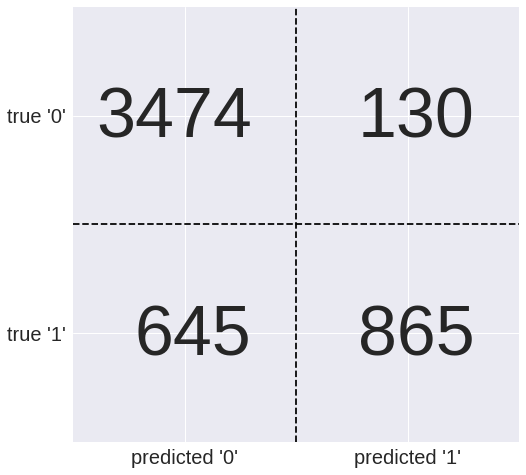

In [0]:
import mglearn
import matplotlib.pyplot as plt
class_names = [0,1]

plt.figure(figsize=(8, 8))
plt.text(0.40, .7, confusion[0, 0], size=70, horizontalalignment='right')
plt.text(0.40, .2, confusion[1, 0], size=70, horizontalalignment='right')
plt.text(.90, .7, confusion[0, 1], size=70, horizontalalignment='right')
plt.text(.90, 0.2, confusion[1, 1], size=70, horizontalalignment='right')
plt.xticks([.25, .75], ["predicted '0'", "predicted '1'"], size=20)
plt.yticks([.25, .75], ["true '1'", "true '0'"], size=20)
plt.plot([.5, .5], [0, 1], '--', c='k')
plt.plot([0, 1], [.5, .5], '--', c='k')

plt.xlim(0, 1)
plt.ylim(0, 1)

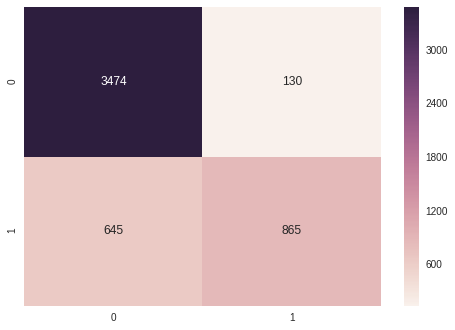

In [0]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt="d")

## 결론
---
히든층이 1개인 기본 모형에서 f1 점수가 0.68로 개선이 필요하다.



## 다층 퍼셉트론(MLP)로 구현 
-----
    scikit learn의 MLPClassifier을 이용

In [0]:
from sklearn.neural_network import MLPClassifier

nb_hl= (100, 3)

##MLP parameter을 dict 로 저장

param_grid_dict = {'solver':['lbfgs', 'adam'], 'activation':['logistic'], 'learning_rate_init':[0.01, 0.001],
                   'hidden_layer_sizes':(100, 2), 'random_state':[20181121]}


grid = GridSearchCV(MLPClassifier(), param_grid=param_grid_dict, cv=5)


In [0]:
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d arr

In [0]:
grid_result.score(X_test, y_test)
grid_result.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 2,
 'learning_rate_init': 0.01,
 'random_state': 20181121,
 'solver': 'adam'}

In [0]:
# Keras에는 f1 score가 없으므로 이를 사용하기 위해서 scikit learn을 이용
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

pred = grid_result.predict(X_test)

f1_score(y_test, pred)

0.6766679826292933

오차 행렬:
[[3438  166]
 [ 653  857]]


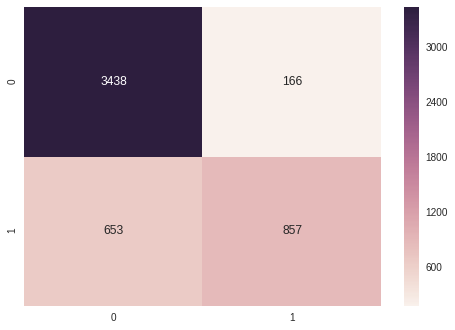

In [0]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

import seaborn as sns
sns.heatmap(confusion, annot=True, fmt="d")

In [0]:
.